In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

2024-12-11 10:48:37.631165: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load a pretrained ResNet50 model
model = ResNet50(weights="imagenet")

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
# Load an image
img_path = "./hammer.jpg"
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
img_array

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [8]:
# Predict the class
predictions = model.predict(img_array)
print("Predicted class:", decode_predictions(predictions, top=3)[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Predicted class: [('n03481172', 'hammer', 0.933294), ('n03804744', 'nail', 0.03771138), ('n03498962', 'hatchet', 0.027150031)]


In [10]:
# Extract first layer
layer_name = "conv1_conv"
intermediate_layer_model = tf.keras.Model(
    inputs=model.input,
    outputs=model.get_layer(layer_name).output
)
intermediate_output = intermediate_layer_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


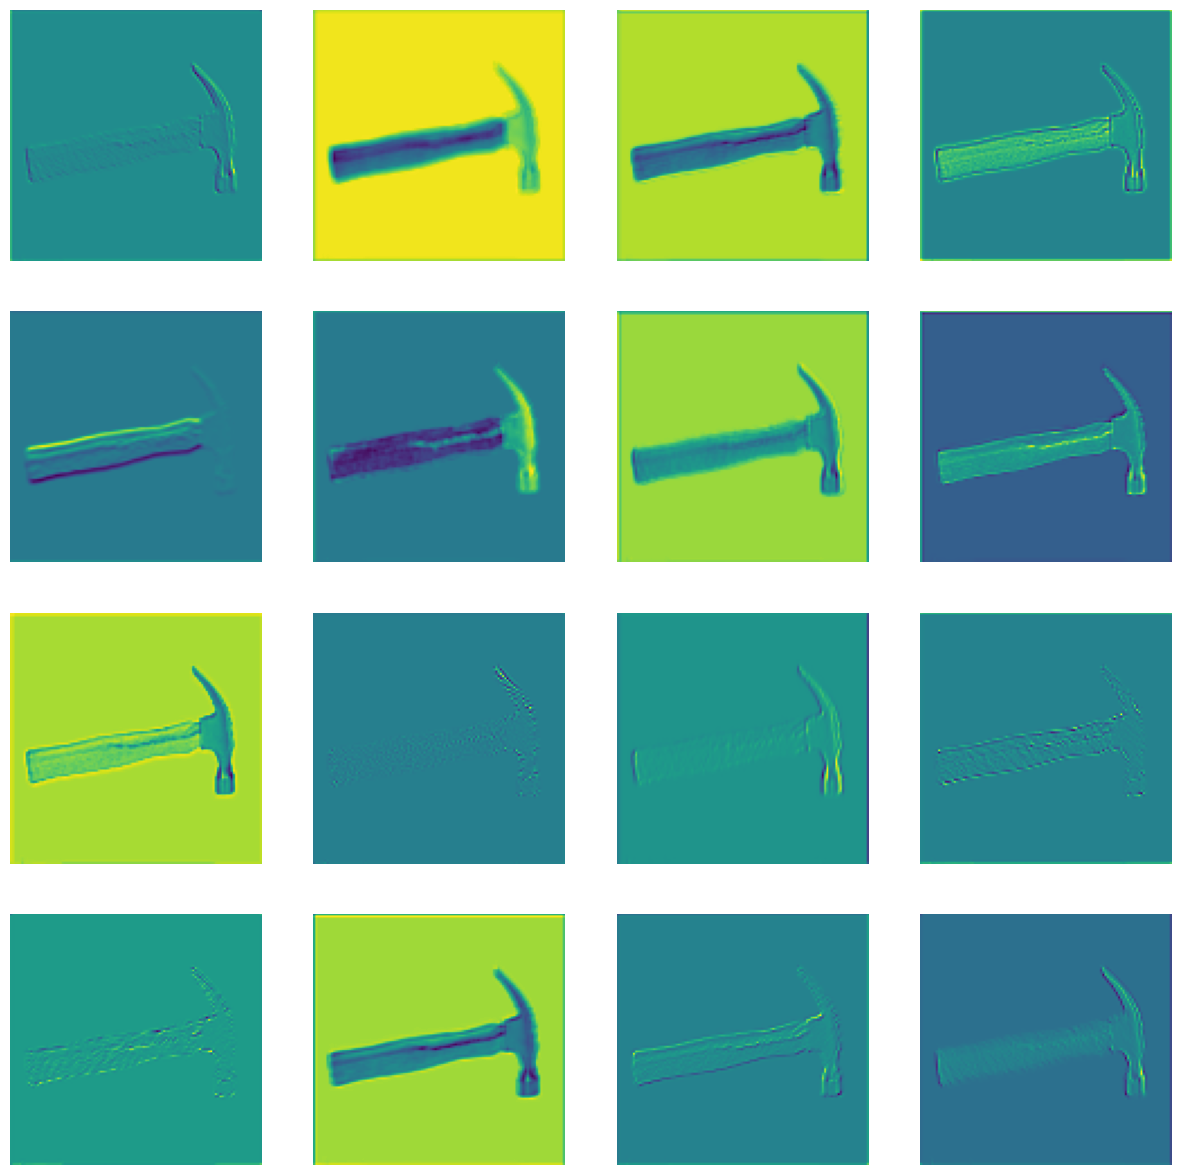

In [16]:
# Visualize the feature maps
feature_maps = intermediate_output[0]
num_maps = feature_maps.shape[-1]

# Plot the first 16 feature maps
plt.figure(figsize=(15, 15))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(feature_maps[:, :, i], cmap="viridis")
    plt.axis("off")

plt.savefig("./feature_map.jpg");
plt.show()

In [18]:
# Extract the final layer
layer_name = "conv5_block3_out"
intermediate_layer_model = tf.keras.Model(
    inputs=model.input,
    outputs=model.get_layer(layer_name).output
)
intermediate_output = intermediate_layer_model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


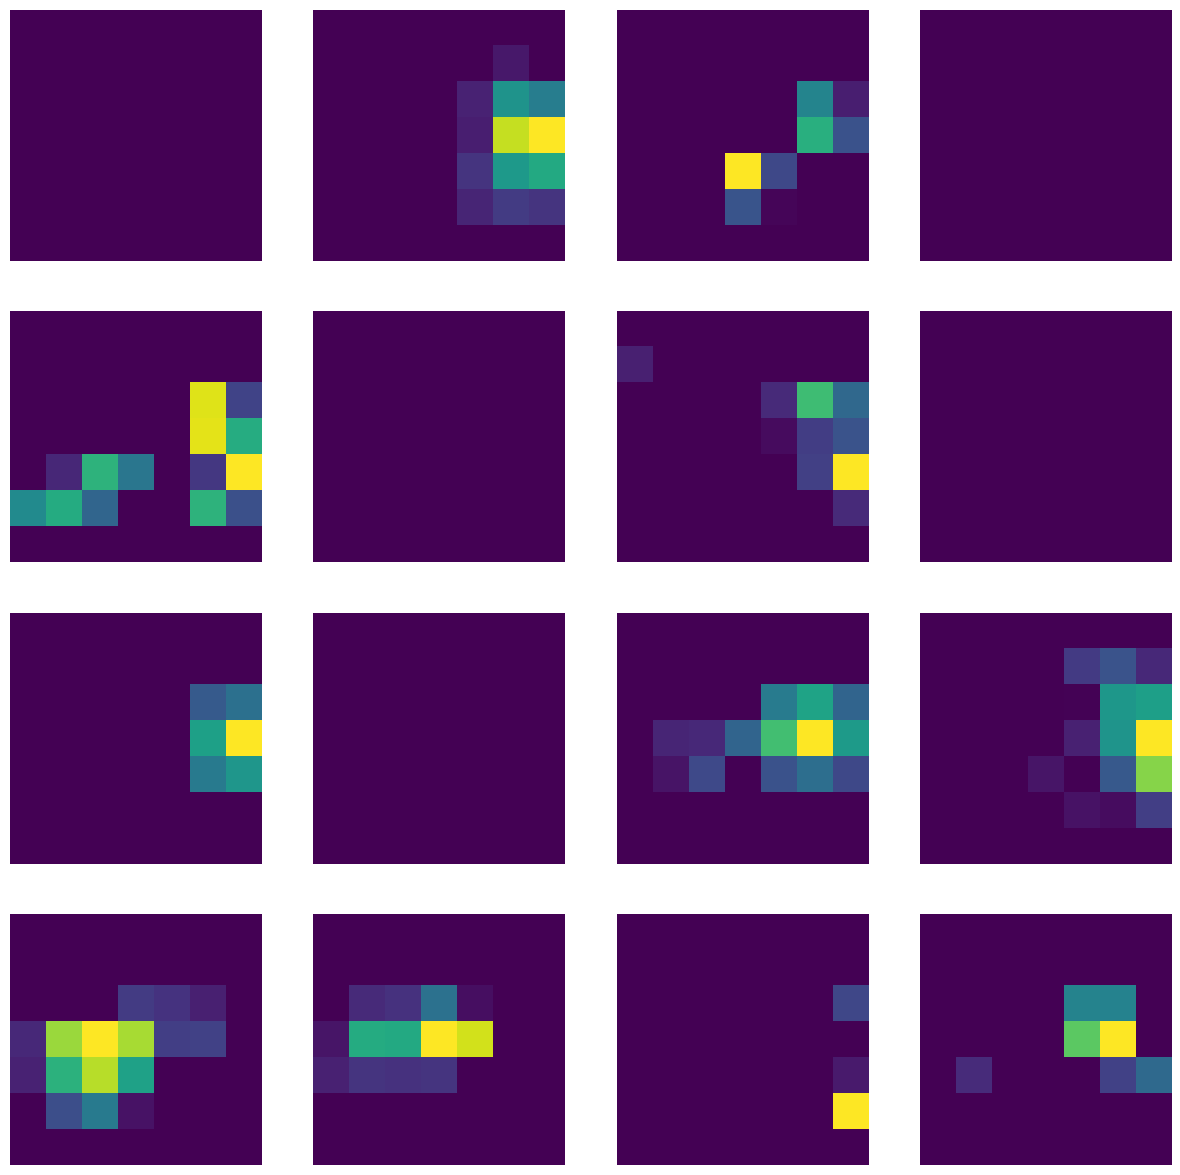

In [20]:
# Visualize the feature maps
feature_maps = intermediate_output[0]
num_maps = feature_maps.shape[-1]

# Plot the first 16 feature maps
plt.figure(figsize=(15, 15))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(feature_maps[:, :, i], cmap="viridis")
    plt.axis("off")

plt.savefig("./feature_map_late.jpg");
plt.show()